# Here the goal is to combine everything Analyse

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
sp = pd.read_csv('./data/sp500.csv')

it = sp[sp['GICS Sector']=='Information Technology']
cs = sp[sp['GICS Sector']=='Communication Services']
cd = sp[sp['GICS Sector']=='Consumer Discretionary']
df = pd.concat([it, cs, cd], ignore_index=True)


# Download Stock data from Yahoo Finance

In [139]:
import yfinance as yf
import pandas as pd
import time
from datetime import datetime, timedelta

# --- Configuration ---

tickers_list = list(df['Symbol'].values)

# 2. Set the size of each batch and the delay between batches
CHUNK_SIZE = 10  # Request 10 tickers at a time
DELAY = 2.0      # Wait 2 seconds between each request

# 3. Define the time period - updated to specific date range 2018-2024
start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 12, 31)
print(f"Downloading daily data from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")


# --- The Robust Download Loop ---

print(f"Starting robust download for {len(tickers_list)} tickers in chunks of {CHUNK_SIZE}...")

# List to hold the downloaded data for each chunk
all_data_chunks = []
failed_tickers = []

# Process the tickers in chunks
for i in range(0, len(tickers_list), CHUNK_SIZE):
    # Get the current chunk of tickers
    chunk = tickers_list[i:i + CHUNK_SIZE]
    
    print(f"\nDownloading chunk {i//CHUNK_SIZE + 1}/{(len(tickers_list) - 1)//CHUNK_SIZE + 1}... Tickers: {chunk}")
    
    try:
        # Download data for the current chunk
        data_chunk = yf.download(
            chunk,
            start=start_date,
            end=end_date,
            group_by='ticker',  # Keep data organized by ticker
            auto_adjust=True,   # Automatically get adjusted prices
            threads=True        # Use multiple threads for speed
        )
        
        # Check if the download returned any data
        if not data_chunk.empty:
            all_data_chunks.append(data_chunk)
        else:
            print(f"-> No data returned for chunk: {chunk}")
            failed_tickers.extend(chunk)

    except Exception as e:
        print(f"-> FAILED to download chunk: {chunk}. Error: {e}")
        failed_tickers.extend(chunk)

    # Be polite and wait before the next request
    print(f"Waiting for {DELAY} seconds...")
    time.sleep(DELAY)


# --- Final Processing ---

if all_data_chunks:
    print("\nDownload process complete. Consolidating data...")
    
    # Concatenate all the collected data chunks into one large DataFrame
    # axis=1 combines them side-by-side
    final_df = pd.concat(all_data_chunks, axis=1)
    
    # Optional: Reorder columns to have a clean multi-level index ('AAPL'/'Open', 'AAPL'/'Close', etc.)
    final_df = final_df.reindex(columns=pd.MultiIndex.from_product([tickers_list, final_df.columns.levels[1]]
                                                                   )).dropna(axis=1, how='all')

    # Save the master DataFrame to a CSV file
    final_df.to_csv('./data/stock_prices.csv')
    
    print(f"\nSUCCESS: All data successfully saved")
    
    # Also report any tickers that might have failed
    if failed_tickers:
        print(f"\nWARNING: The following tickers failed to download and are not in the file: {list(set(failed_tickers))}")
else:
    print("\nNo data was downloaded successfully.")

Starting robust download for 141 tickers in chunks of 10...



[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed

1 Failed download:
['HAS']: Timeout('Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['HAS']: Timeout('Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  10 of 10 completed



Waiting for 2.0 seconds...




[*********************100%***********************]  1 of 1 completed



Waiting for 2.0 seconds...

Download process complete. Consolidating data...

Download process complete. Consolidating data...

SUCCESS: All data successfully saved

SUCCESS: All data successfully saved


# Making dataframe ready for analysis

In [242]:
# Load Analysis Results to merge
df_it_porter = pd.read_csv('./data/IT_analysis/it_porter_analysis_results.csv')
df_it_power = pd.read_csv('./data/IT_analysis/it_power_analysis_results.csv')

df_cs_porter = pd.read_csv('./data/CS_analysis/cs_porter_analysis_results.csv')
df_cs_power = pd.read_csv('./data/CS_analysis/cs_power_analysis_results.csv')


df_cd_porter = pd.read_csv('./data/CD_analysis/cd_porter_analysis_results.csv')
df_cd_power = pd.read_csv('./data/CD_analysis/cd_power_analysis_results.csv')


# concatenate all the dataframes
df_porter = pd.concat([df_it_porter, df_cs_porter, df_cd_porter], ignore_index=True)
df_power = pd.concat([df_it_power, df_cs_power, df_cd_power], ignore_index=True)


# Rename columns for clarity
df_power = df_power.rename(columns={'gemini_response': 'power_analysis'})
df_porter = df_porter.rename(columns={'gemini_response': 'porter_analysis'})


In [243]:
df_power.head(5)

,ticker,filing_date,section,content,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,porter_prompt,power_analysis,seven_powers_prompt,Unnamed: 0
0,ACN,2024-08-31,Item 1. Business,Business 2 Business Overview Accenture is a le...,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,You are a financial analyst engine. Your task ...,"```json\n{\n ""analysis"": {\n ""scale_econom...",You are a strategic business analyst specializ...,NaN
1,ACN,2024-08-31,Item 1A. Risk Factors,Risk Factors 18 Risk Factors In addition to th...,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,You are a financial analyst engine. Your task ...,"```json\n{\n ""analysis"": {\n ""scale_econom...",You are a strategic business analyst specializ...,NaN
2,ACN,2024-08-31,Item 1C. Cybersecurity,Cybersecurity 33 Cybersecurity Cybersecurity R...,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,You are a financial analyst engine. Your task ...,"```json\n{\n ""analysis"": {\n ""scale_econom...",You are a strategic business analyst specializ...,NaN
3,ACN,2024-08-31,Item 2. Properties,Properties We have major offices in the world’...,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,You are a financial analyst engine. Your task ...,"```json\n{\n ""analysis"": {\n ""scale_econom...",You are a strategic business analyst specializ...,NaN
4,ACN,2024-08-31,Item 3. Legal Proceedings,Legal Proceedings The information set forth un...,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,You are a financial analyst engine. Your task ...,"```json\n{\n ""analysis"": {\n ""scale_econom...",You are a strategic business analyst specializ...,NaN


### Merge all the dataframe in merged_df 

In [244]:
"""# Merge df_it_porter with only the power_analysis column from df_it_power on Symbol
merged_df = df_porter.merge(df_power[['Symbol', 'power_analysis']], 
                              on='Symbol',
                              how='inner',
                              suffixes=('', '_power'))




merged_df = merged_df.drop_duplicates(subset='porter_analysis', keep='first')
merged_df = merged_df.drop(columns=['ticker','Headquarters Location', 'content','porter_prompt','Founded','Date added','CIK'])"""

"# Merge df_it_porter with only the power_analysis column from df_it_power on Symbol\nmerged_df = df_porter.merge(df_power[['Symbol', 'power_analysis']], \n                              on='Symbol',\n                              how='inner',\n                              suffixes=('', '_power'))\n\n\n\n\nmerged_df = merged_df.drop_duplicates(subset='porter_analysis', keep='first')\nmerged_df = merged_df.drop(columns=['ticker','Headquarters Location', 'content','porter_prompt','Founded','Date added','CIK'])"

### Porter Analysis Parsing Gemini data

In [245]:
import json

# Method 1: Display full text of a specific cell without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)



# Reset display options if needed
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

In [246]:
import json
import pandas as pd
import re


# Create an empty list to store the dictionaries from our parsed JSON
parsed_rows = []

print("Starting JSON parsing and cleaning...")

# Iterate through each text entry in the 'porter_analysis' column
for json_text in df_porter['porter_analysis']:
    
    # This block is the "unrolled" logic from the previous function
    
    # Handle empty or NaN values
    if pd.isna(json_text) or not str(json_text).strip():
        parsed_rows.append({}) # Append an empty dict and skip to the next iteration
        continue

    text = str(json_text)

    # --- A MORE ROBUST REGEX-BASED PATCH ---
    # This finds the specific erroneous pattern: a period, a quote, whitespace, and "aswell"
    # It replaces it with a period, a space, and "as well", effectively fixing the sentence.
    # This is better than replacing the entire long string.
    text = re.sub(r'\."\s+aswell', '. as well', text)

    # Standard cleaning to remove markdown and excess whitespace
    text = text.strip()
    if text.startswith('```json'): text = text[7:]
    elif text.startswith('```'): text = text[3:]
    if text.endswith('```'): text = text[:-3]
    text = text.strip()

    # The try/except block for parsing the cleaned text
    try:
        # If successful, parse the JSON and append the resulting dictionary
        parsed_rows.append(json.loads(text))
    except (json.JSONDecodeError, Exception) as e:
        # If parsing fails, append a dictionary containing the error for later analysis
        parsed_rows.append({'error': f"Parsing Error: {e}", 'original_text': json_text})

print("Parsing and cleaning complete.")


# --- 2. Flattening and Merging (Logic remains the same) ---

# Separate the successfully parsed dictionaries from any that returned an error
successful_data = []
successful_indices = []
for i, data in enumerate(parsed_rows):
    if 'error' not in data:
        successful_data.append(data)
        successful_indices.append(i) # Keep track of the original position

# Proceed only if there are successful rows to process
if successful_data:
    # Use json_normalize to flatten the nested 'analysis' dictionary
    # This is the most efficient way to create the columns
    normalized_df = pd.json_normalize(successful_data)
    
    # Get the original DataFrame index for the successful rows
    original_indices = df_porter.index[successful_indices]
    normalized_df.index = original_indices

    # Join the final parsed data back to the original dataframe
    # We drop 'porter_analysis' from the original df and join the new columns
    df_porter = df_porter.drop(columns=['porter_analysis']).join(normalized_df)
else:
    print("No rows were successfully parsed. df_porter will be a copy of the original DataFrame.")
    df_porter = df_porter.copy() # Avoid errors if nothing was parsed


# --- 3. Final Analysis (Logic remains the same) ---
print("\n--- Final Status ---")
# Check for an 'error' column in the final dataframe
if 'error' in df_porter.columns:
    error_count = df_porter['error'].notna().sum()
    if error_count > 0:
        print(f"\n{error_count} rows could not be parsed.")
        print("--- Rows That Still Have Parsing Errors ---")
        pd.set_option('display.max_colwidth', 80)
        print(df_porter[df_porter['error'].notna()][['error']])
    else:
        print("\n✅ All rows parsed successfully!")
else:
    print("\n✅ All rows parsed successfully!")

# Create a list of new columns that were added
new_cols = [col for col in df_porter.columns if col not in df_porter.columns]
# Add back a couple of key columns for context if they exist
if 'primary_force' in df_porter.columns: new_cols.insert(0, 'primary_force')
if 'threat_level.threat_of_new_entrants' in df_porter.columns: new_cols.insert(1, 'threat_level.threat_of_new_entrants')
    
# Filter out columns that might not exist in all runs to prevent KeyErrors
existing_new_cols = [col for col in new_cols if col in df_porter.columns]

Starting JSON parsing and cleaning...
Parsing and cleaning complete.

--- Final Status ---

✅ All rows parsed successfully!


### Parse Hamilton's 7 Power

In [247]:
# Create an empty list to store the dictionaries from our parsed JSON
parsed_rows = []


COLUMN_TO_PARSE = 'power_analysis' 

print(f"Starting JSON parsing and cleaning for column: '{COLUMN_TO_PARSE}'...")

# Iterate through each text entry in the specified column
# Make sure your DataFrame is named 'merged_df' or change it below
for json_text in df_power[COLUMN_TO_PARSE]:
    
    # Handle empty or NaN values
    if pd.isna(json_text) or not str(json_text).strip():
        parsed_rows.append({}) # Append an empty dict and skip
        continue

    text = str(json_text)

    # --- A MORE ROBUST REGEX-BASED PATCH ---
    # can be added here.

    # Standard cleaning to remove markdown and excess whitespace
    text = text.strip()
    if text.startswith('```json'): text = text[7:]
    elif text.startswith('```'): text = text[3:]
    if text.endswith('```'): text = text[:-3]
    text = text.strip()

    # The try/except block for parsing the cleaned text
    try:
        # If successful, parse the JSON and append the resulting dictionary
        parsed_rows.append(json.loads(text))
    except (json.JSONDecodeError, Exception) as e:
        # If parsing fails, append a dictionary containing the error for later analysis
        parsed_rows.append({'error': f"Parsing Error: {e}", 'original_text': json_text})

print("Parsing and cleaning complete.")


# --- 2. Flattening and Merging ---

# Separate the successfully parsed dictionaries from any that returned an error
successful_data = []
successful_indices = []
for i, data in enumerate(parsed_rows):
    # Ensure the dictionary is not empty and has no errors
    if data and 'error' not in data:
        successful_data.append(data)
        successful_indices.append(i) # Keep track of the original position

# Proceed only if there are successful rows to process
if successful_data:
    # Use json_normalize to automatically flatten the entire nested structure.
    # It will create columns like 'analysis.scale_economies.confidence_of_fit'
    normalized_df = pd.json_normalize(successful_data)
    
    # Optional: Clean up column names by removing the leading 'analysis.' prefix
    normalized_df.columns = [col.replace('analysis.', '') for col in normalized_df.columns]
    
    # Get the original DataFrame index for the successful rows to ensure correct alignment
    original_indices = df_power.index[successful_indices]
    normalized_df.index = original_indices

    # Join the final parsed data back to the original dataframe
    # We drop the original JSON column and join the new flattened columns
    df_power = df_power.drop(columns=[COLUMN_TO_PARSE]).join(normalized_df)
else:
    print("No rows were successfully parsed. df_power will be a copy of the original DataFrame.")
    df_power = df_power.copy()


# --- 3. Final Analysis ---
print("\n--- Final Status ---")
# Check for an 'error' column in the final dataframe
if 'error' in df_power.columns:
    error_count = df_power['error'].notna().sum()
    if error_count > 0:
        print(f"\n{error_count} rows could not be parsed.")
        print("--- Rows That Still Have Parsing Errors ---")
        print(df_power[df_power['error'].notna()][['error']])
    else:
        print("\n✅ All rows parsed successfully!")
else:
    print("\n✅ All rows parsed successfully!")


# Create a list of new columns to display in the sample
# This will show the top-level fields and some key flattened fields
sample_cols = [
    'primary_power',
    'power_timing',
    'scale_economies.power_strength',
    'switching_costs.power_strength',
    'process_power.power_strength',
    'branding.power_strength'
]
    
# Filter out columns that might not exist in the final df to prevent KeyErrors
existing_sample_cols = [col for col in sample_cols if col in df_power.columns]


Starting JSON parsing and cleaning for column: 'power_analysis'...
Parsing and cleaning complete.

--- Final Status ---

✅ All rows parsed successfully!


# Reddit data

In [232]:
rd = pd.read_csv('./data/reddit_analysis_results.csv')
rd1 = pd.read_csv('./data/reddit_analysis_results_1819.csv')
rd = pd.concat([rd, rd1], ignore_index=True)
rd = rd.rename(columns={'gemini_response': 'reddit_analysis'})
rd = rd.drop(columns=['reddit_sentiment_prompt','comments','is_self','flair'])

In [233]:
rd.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,post_id,title,...,score,upvote_ratio,created_utc,num_comments,author,url,subreddit,category,year,reddit_analysis
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,mceprg,It's not just me right?,...,6957,0.92,2021-03-24,2760,calipfarris01,https://www.reddit.com/r/stocks/comments/mcepr...,stocks,stock_specific,2021,"{\n ""post_summary"": {\n ""thesis"": ""The ori..."
1,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,rrhoka,To all of you who are red this year while the ...,...,5852,0.91,2021-12-29,1156,karnoculars,https://www.reddit.com/r/stocks/comments/rrhok...,stocks,stock_specific,2021,"{\n ""post_summary"": {\n ""thesis"": ""The ori..."
2,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,ja9wv0,"I have $213,000 in Apple (AAPL) stock, should ...",...,2461,0.93,2020-10-13,727,sleeping_in_,https://www.reddit.com/r/stocks/comments/ja9wv...,stocks,stock_specific,2020,"{\n ""post_summary"": {\n ""thesis"": ""The aut..."
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,qkmmmq,"If you could put 3k into AAPL, MSFT, or FB, wh...",...,623,0.89,2021-11-01,712,DippySwitch,https://www.reddit.com/r/stocks/comments/qkmmm...,stocks,stock_specific,2021,"{\n ""post_summary"": {\n ""thesis"": ""The ori..."
4,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,18s30mt,"Whats your ""this could be the next tsla or aap...",...,274,0.78,2023-12-27,545,rpatel09,https://www.reddit.com/r/stocks/comments/18s30...,stocks,stock_specific,2023,"{\n ""post_summary"": {\n ""thesis"": ""The ori..."
5,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,ukldms,How far do you think MSFT and AAPL could fall?,...,514,0.92,2022-05-07,526,apooroldinvestor,https://www.reddit.com/r/stocks/comments/ukldm...,stocks,stock_specific,2022,"{\n ""post_summary"": {\n ""thesis"": ""The ori..."
6,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,1ciq1fw,Apple announces largest-ever $110 billion shar...,...,2990,0.94,2024-05-02,522,Puginator,https://www.reddit.com/r/stocks/comments/1ciq1...,stocks,stock_specific,2024,"{\n ""post_summary"": {\n ""thesis"": ""Apple r..."
7,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,wqy6lj,I SOLD AAPL :(,...,834,0.85,2022-08-17,433,amoottake,https://www.reddit.com/r/stocks/comments/wqy6l...,stocks,stock_specific,2022,"{\n ""post_summary"": {\n ""thesis"": ""The aut..."
8,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,zsuvnl,AAPL is at 52-week low!,...,870,0.88,2022-12-22,399,paq12x,https://www.reddit.com/r/stocks/comments/zsuvn...,stocks,stock_specific,2022,"{\n ""post_summary"": {\n ""thesis"": ""The ori..."
9,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,16cfl90,"China plans to expand its ban on iPhones, AAPL...",...,772,0.94,2023-09-07,398,msaleem,https://www.reddit.com/r/stocks/comments/16cfl...,stocks,stock_specific,2023,"{\n ""post_summary"": {\n ""thesis"": ""The ori..."


In [234]:
import json
import pandas as pd

# --- 1. Parse Text with Error Reporting and Row Removal ---

# We will now store tuples of (index, data) to keep track of the original index
parsed_data_with_indices = []
# !!! IMPORTANT: Replace 'your_text_column_name' with the actual name of your column
COLUMN_TO_PARSE = 'reddit_analysis'

print(f"Starting text parsing for column: '{COLUMN_TO_PARSE}' with error reporting...")

# We will use .iterrows() to get the index for better error messages
for index, row in rd.iterrows():
    text_data = row[COLUMN_TO_PARSE]
    
    # Handle any potential null/empty values
    if pd.isna(text_data) or not str(text_data).strip():
        # This will skip null rows as before
        continue

    text = str(text_data).strip()
    
    # This try/except block is for debugging. It will find and print any bad rows.
    try:
        # On success, append a tuple of the original index and the parsed dictionary
        parsed_data_with_indices.append((index, json.loads(text)))
    except json.JSONDecodeError as e:
        # --- MODIFICATION START ---
        # This code now runs ONLY if a row is not valid JSON.
        # Instead of saving an error, we print the message and skip the row.
        print("-" * 60)
        print(f"!!! JSON FORMAT ERROR FOUND at index: {index} - ROW SKIPPED !!!")
        print(f"Error Message: {e}")
        continue # Skip to the next row in the loop
        # --- MODIFICATION END ---

# --- 2. Normalize and Create Final DataFrame ---

print(f"\nParsing complete. Found {len(parsed_data_with_indices)} valid rows to process.")

if parsed_data_with_indices:
    # --- MODIFICATION START ---
    # Separate the indices and the data from our list of tuples
    original_indices = [item[0] for item in parsed_data_with_indices]
    successful_data = [item[1] for item in parsed_data_with_indices]

    # Normalize the successful data as before
    normalized_df = pd.json_normalize(successful_data)
    
    # Set the DataFrame index to the original indices we saved
    normalized_df.index = original_indices
    # --- MODIFICATION END ---

    # Get the subset of the original DataFrame that corresponds to our successful rows
    original_data_subset = rd.loc[original_indices].drop(columns=[COLUMN_TO_PARSE])
    
    # Concatenate the original data (minus the parsed column) with the new normalized columns
    rd_final = pd.concat([original_data_subset, normalized_df], axis=1)

    print(f"Created {len(normalized_df.columns)} new columns from the text data.")
    print("\n--- Sample of Successfully Parsed Data ---")
    sample_cols = [
        'market_outlook', 'post_summary.thesis', 'quantitative_analysis.sentiment_score'
    ]
    existing_sample_cols = [col for col in sample_cols if col in rd_final.columns]
    # This check is just to prevent an error if sample columns don't exist
    if existing_sample_cols:
        print(rd_final[existing_sample_cols].head())

else:
    print("No rows were successfully parsed.")

Starting text parsing for column: 'reddit_analysis' with error reporting...
------------------------------------------------------------
!!! JSON FORMAT ERROR FOUND at index: 1618 - ROW SKIPPED !!!
Error Message: Expecting ':' delimiter: line 5 column 26 (char 615)
------------------------------------------------------------
!!! JSON FORMAT ERROR FOUND at index: 1673 - ROW SKIPPED !!!
Error Message: Expecting ':' delimiter: line 5 column 26 (char 517)

Parsing complete. Found 3325 valid rows to process.
Created 35 new columns from the text data.

--- Sample of Successfully Parsed Data ---
  market_outlook                                post_summary.thesis  \
0        Bearish  The original poster is experiencing significan...   
1        Bullish  The original post refutes the common narrative...   
2    Contentious  The author, holding $213,000 entirely in Apple...   
3        Bullish  The original post seeks advice on a 'safe' pla...   
4        Bullish  The original post seeks long-te

I have a lot of columns with a lot of NaN values (Not all of them are empty) in my cell so I will need to remove them all. Instead of removing column one by one I will simply remove all the columns that are majority empty. 

In [235]:
# Calculate the percentage of NaN values in each column
nan_percentages = rd_final.isna().mean()

# Get columns that have more than 95% NaN values
columns_to_drop = nan_percentages[nan_percentages > 0.95].index

# Drop these columns
rd_final = rd_final.drop(columns=columns_to_drop)


# Drop specific columns that are not needed
rd_final = rd_final.drop(columns=['Headquarters Location','Date added','CIK','Founded'])


In [236]:
rd_final.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,post_id,title,post,score,upvote_ratio,created_utc,...,market_outlook,post_summary.thesis,post_summary.evidence_type,comments_summary.main_theme,comments_summary.counter_arguments,comments_summary.corroborating_points,quantitative_analysis.sentiment_score,quantitative_analysis.sentiment_reasoning,quantitative_analysis.conviction_level,quantitative_analysis.predominant_emotion
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",mceprg,It's not just me right?,For the past month I've been getting absolutel...,6957,0.92,2021-03-24,...,Bearish,The original poster is experiencing significan...,Personal Opinion,The overwhelming sentiment in the comments is ...,[Some comments suggest that the entire market ...,"[Numerous comments explicitly state 'Same,' 'Y...",-0.6,The discussion is dominated by reports of sign...,High,Uncertainty
1,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",rrhoka,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...,5852,0.91,2021-12-29,...,Bullish,The original post refutes the common narrative...,Quantitative Data / Market Data Analysis,"The comments present a mixed response, debatin...",[Mega-cap tech and healthcare sectors (includi...,[Acknowledgement that index funds (like VTI) a...,0.7,The original post is strongly bullish on the o...,High,Analytical
2,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",ja9wv0,"I have $213,000 in Apple (AAPL) stock, should ...","I always tell myself to stop buying Apple, but...",2461,0.93,2020-10-13,...,Contentious,"The author, holding $213,000 entirely in Apple...",Personal Opinion,The comments generally acknowledge the success...,"[Despite past success, concentrating an entire...","[Strong belief in Apple's continued growth, wi...",0.7,"The overall sentiment is bullish towards AAPL,...",High,Uncertainty
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",qkmmmq,"If you could put 3k into AAPL, MSFT, or FB, wh...",I’m looking for a “safe” place to put 3k. Argu...,623,0.89,2021-11-01,...,Bullish,The original post seeks advice on a 'safe' pla...,Personal Opinion,The comments largely agree that both AAPL and ...,No direct bearish arguments against AAPL are p...,[AAPL's ad revenue increasing significantly (e...,0.6,The discussion consistently frames AAPL as a '...,High,Analytical
4,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",18s30mt,"Whats your ""this could be the next tsla or aap...",Just like the title says.... what are people's...,274,0.78,2023-12-27,...,Bullish,The original post seeks long-term investment i...,Speculation,"Based on the provided comment, the main theme ...",The most significant counter-argument is that ...,None from the provided comment. The comment di...,0.7,The original post uses AAPL as a benchmark for...,High,Confidence


I have at least 1 datapoint per week and have a maximum of 40 posts per week. We need to condense the results weekly so we can analyze them alongside other datapoints

### How many datapoints do I have every week. This is important to have enough data-points every week or do a normalization function before merging with the model

Complete Weekly Analysis (2018-2024):
Total weeks in period: 366
Weeks WITH data: 345
Weeks with NO data: 21
Percentage of weeks with data: 94.3%
Percentage of weeks with NO data: 5.7%

First few weeks with no data: ['2018-W01', '2018-W11', '2018-W25', '2018-W27', '2018-W36', '2018-W46', '2018-W49', '2019-W01', '2019-W09', '2019-W13']
Last few weeks with no data: ['2019-W24', '2019-W27', '2019-W30', '2019-W37', '2019-W40', '2019-W52', '2020-W01', '2020-W03', '2022-W27', '2023-W33']

Statistics for ALL weeks (including zeros):
Maximum posts in any week: 40
Average posts per week (including zero weeks): 8.18
Average posts per week (only weeks with data): 8.68


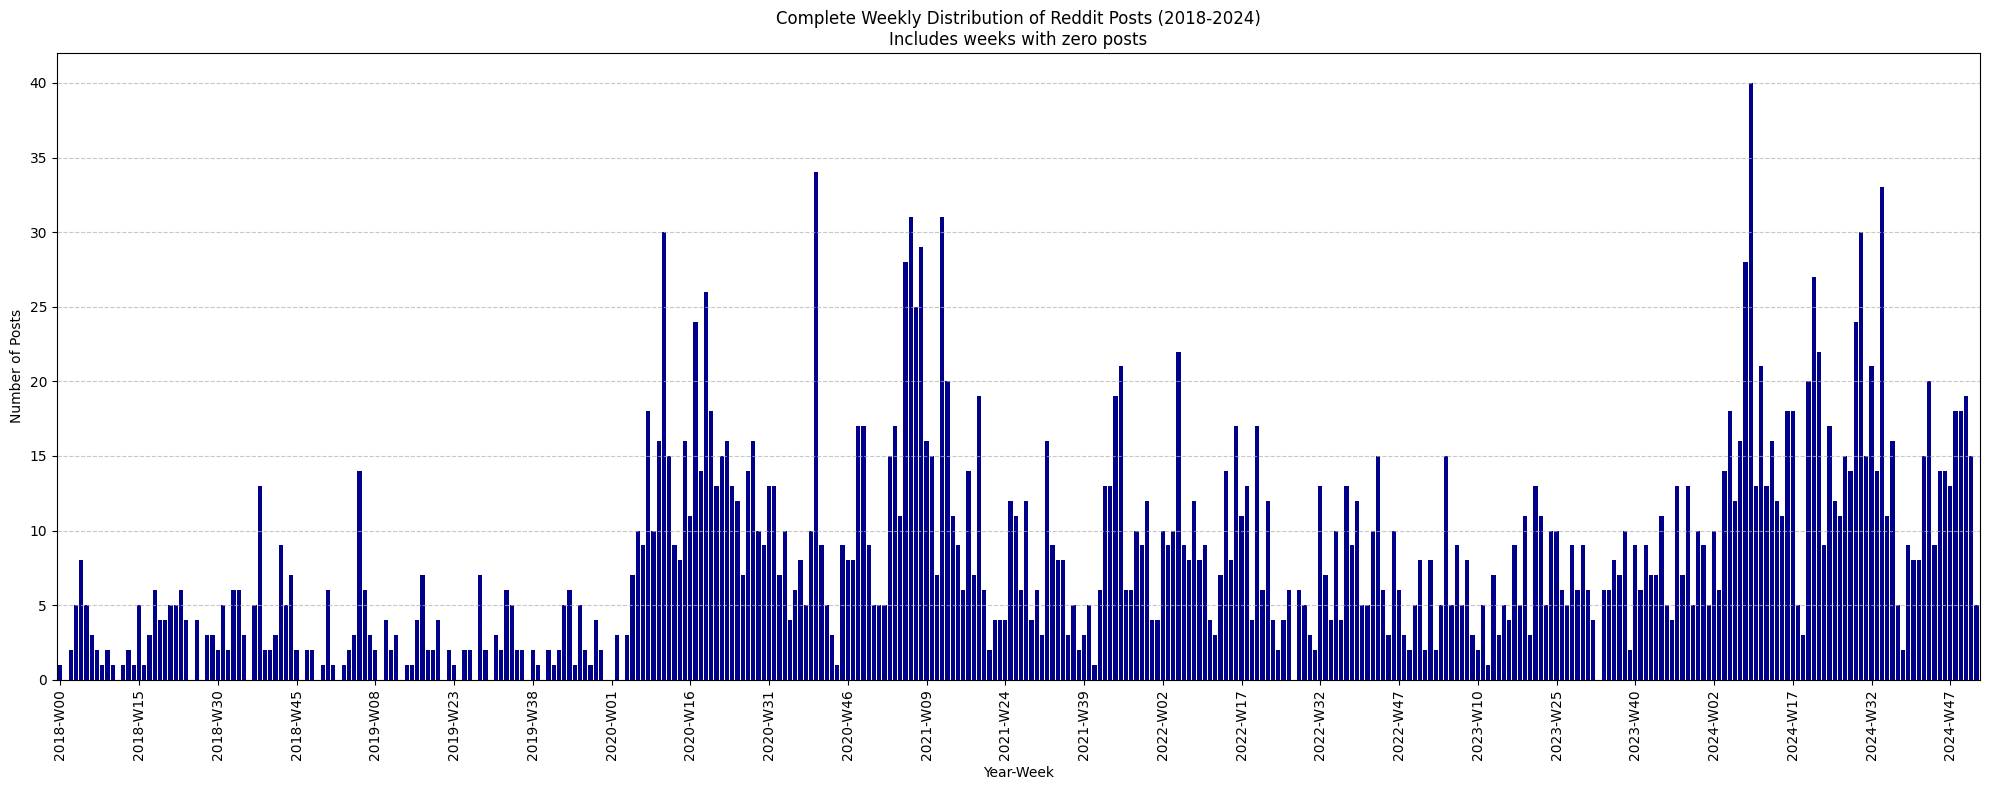


Complete weekly timeline (first 20 weeks):
2018-W00    1
2018-W01    0
2018-W02    2
2018-W03    5
2018-W04    8
2018-W05    5
2018-W06    3
2018-W07    2
2018-W08    1
2018-W09    2
2018-W10    1
2018-W11    0
2018-W12    1
2018-W13    2
2018-W14    1
2018-W15    5
2018-W16    1
2018-W17    3
2018-W18    6
2018-W19    4
dtype: int64


In [239]:
# Convert the created_utc column to datetime format for better analysis
rd_final['created_utc'] = pd.to_datetime(rd_final['created_utc'])

# Extract week information
rd_final['year_week'] = rd_final['created_utc'].dt.strftime('%Y-W%U')

# Get the actual weekly distribution from your data
actual_weekly_distribution = rd_final['year_week'].value_counts().sort_index()

# Create a complete linear weekly timeline from 2018 to 2024
import pandas as pd
from datetime import datetime, timedelta

# Create complete date range from start of 2018 to end of 2024
start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 12, 31)

# Generate all weeks in this range
all_weeks = []
current_date = start_date
while current_date <= end_date:
    week_label = current_date.strftime('%Y-W%U')
    all_weeks.append(week_label)
    current_date += timedelta(weeks=1)

# Convert to pandas Series for easier handling
complete_weekly_timeline = pd.Series(index=all_weeks, data=0)

# Fill in actual data where it exists
for week, count in actual_weekly_distribution.items():
    if week in complete_weekly_timeline.index:
        complete_weekly_timeline[week] = count

# Analysis of missing data
weeks_with_data = (complete_weekly_timeline > 0).sum()
weeks_with_no_data = (complete_weekly_timeline == 0).sum()
total_weeks = len(complete_weekly_timeline)

print("Complete Weekly Analysis (2018-2024):")
print(f"Total weeks in period: {total_weeks}")
print(f"Weeks WITH data: {weeks_with_data}")
print(f"Weeks with NO data: {weeks_with_no_data}")
print(f"Percentage of weeks with data: {(weeks_with_data/total_weeks)*100:.1f}%")
print(f"Percentage of weeks with NO data: {(weeks_with_no_data/total_weeks)*100:.1f}%")

# Find consecutive periods of missing data
missing_weeks = complete_weekly_timeline[complete_weekly_timeline == 0].index.tolist()
print(f"\nFirst few weeks with no data: {missing_weeks[:10]}")
print(f"Last few weeks with no data: {missing_weeks[-10:]}")

# Create visualization showing ALL weeks including zeros
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
complete_weekly_timeline.plot(kind='bar', color='darkblue', width=0.8)
plt.title('Complete Weekly Distribution of Reddit Posts (2018-2024)\nIncludes weeks with zero posts')
plt.xlabel('Year-Week')
plt.ylabel('Number of Posts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Show every nth tick to avoid overcrowding
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.tight_layout()

# Additional statistics
print(f"\nStatistics for ALL weeks (including zeros):")
print(f"Maximum posts in any week: {complete_weekly_timeline.max()}")
print(f"Average posts per week (including zero weeks): {complete_weekly_timeline.mean():.2f}")
print(f"Average posts per week (only weeks with data): {complete_weekly_timeline[complete_weekly_timeline > 0].mean():.2f}")

plt.show()

# Show the complete timeline data
print(f"\nComplete weekly timeline (first 20 weeks):")
print(complete_weekly_timeline.head(20))

# Financial Text Analysis
## The goal now is to have dataframe that is ready for full ML analysis. This means I will remove any justifications and only keep the quantitative numbers that can be used by the Model

In [248]:
# Calculate the minimum number of non-empty values required to keep a row (30% of total columns)
min_non_empty_values = int(len(df_porter.columns) * 0.51)
# Drop rows that do not meet this threshold
porter_analysis = df_porter.dropna(axis=0, thresh=min_non_empty_values)

# Get a list of columns that end with .relevant_quotes or .justification
cols_to_drop = [col for col in porter_analysis.columns if col.endswith(('.relevant_quotes', '.justification'))]
# Drop these columns from df_porter
porter_analysis = porter_analysis.drop(columns=cols_to_drop)

porter_analysis = porter_analysis.drop(columns=['ticker','content','Headquarters Location','Unnamed: 0','overall_summary','CIK','Date added','Founded','porter_prompt'])


In [249]:
porter_analysis.columns

Index(['filing_date', 'section', 'Symbol', 'Security', 'GICS Sector',
       'GICS Sub-Industry', 'primary_force',
       'analysis.threat_of_new_entrants.confidence_of_fit',
       'analysis.threat_of_new_entrants.threat_level',
       'analysis.bargaining_power_of_buyers.confidence_of_fit',
       'analysis.bargaining_power_of_buyers.threat_level',
       'analysis.bargaining_power_of_suppliers.confidence_of_fit',
       'analysis.bargaining_power_of_suppliers.threat_level',
       'analysis.threat_of_substitute_products.confidence_of_fit',
       'analysis.threat_of_substitute_products.threat_level',
       'analysis.intensity_of_rivalry.confidence_of_fit',
       'analysis.intensity_of_rivalry.threat_level'],
      dtype='object')

### Power Analysis

In [250]:
# Calculate the minimum number of non-empty values required to keep a row (30% of total columns)
min_non_empty_values = int(len(df_power.columns) * 0.55)

# Drop rows that do not meet this threshold
power_analysis = df_power.dropna(axis=0, thresh=min_non_empty_values)

# Get a list of columns that end with any of the specified suffixes
suffixes_to_remove = ['.swot_classification', '.relevant_quotes', '.key_indicators', '.justification']
cols_to_drop = [col for col in power_analysis.columns if any(col.endswith(suffix) for suffix in suffixes_to_remove)]

# Drop these columns from power_analysis
power_analysis = power_analysis.drop(columns=cols_to_drop)

power_analysis = power_analysis.drop(columns=['ticker','content','Founded','Headquarters Location','Unnamed: 0','overall_summary','CIK','porter_prompt','seven_powers_prompt','primary_power_timing','Date added'])

In [251]:
power_analysis.head(25).T

,0,1,2,3,4,5,7,9,10,11,...,18,19,20,21,22,23,24,25,26,27
filing_date,2024-08-31,2024-08-31,2024-08-31,2024-08-31,2024-08-31,2024-08-31,2024-11-29,2024-11-29,2024-11-29,2024-11-29,...,2024-12-28,2024-12-31,2024-12-31,2024-12-31,2024-12-31,2024-12-31,2024-12-31,2024-12-31,2024-12-31,2024-12-31
section,Item 1. Business,Item 1A. Risk Factors,Item 1C. Cybersecurity,Item 2. Properties,Item 3. Legal Proceedings,Item 7. Management Discussion and Analysis,Item 1. Business,Item 1C. Cybersecurity,Item 2. Properties,Item 7. Management Discussion and Analysis,...,Item 7A. Quantitative and Qualitative Disclosu...,Item 1. Business,Item 1A. Risk Factors,Item 1C. Cybersecurity,Item 2. Properties,Item 3. Legal Proceedings,Item 7. Management Discussion and Analysis,Item 7A. Quantitative and Qualitative Disclosu...,Item 1. Business,Item 1A. Risk Factors
Symbol,ACN,ACN,ACN,ACN,ACN,ACN,ADBE,ADBE,ADBE,ADBE,...,AMD,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,APH,APH
Security,Accenture,Accenture,Accenture,Accenture,Accenture,Accenture,Adobe Inc.,Adobe Inc.,Adobe Inc.,Adobe Inc.,...,Advanced Micro Devices,Akamai Technologies,Akamai Technologies,Akamai Technologies,Akamai Technologies,Akamai Technologies,Akamai Technologies,Akamai Technologies,Amphenol,Amphenol
GICS Sector,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,...,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology
GICS Sub-Industry,IT Consulting & Other Services,IT Consulting & Other Services,IT Consulting & Other Services,IT Consulting & Other Services,IT Consulting & Other Services,IT Consulting & Other Services,Application Software,Application Software,Application Software,Application Software,...,Semiconductors,Internet Services & Infrastructure,Internet Services & Infrastructure,Internet Services & Infrastructure,Internet Services & Infrastructure,Internet Services & Infrastructure,Internet Services & Infrastructure,Internet Services & Infrastructure,Electronic Components,Electronic Components
primary_power,process_power,Counter-Positioning,process_power,process_power,N/A,Scale Economies,switching_costs,process_power,scale_economies,switching_costs,...,process_power,Scale Economies,scale_economies,process_power,process_power,branding,Process Power,Process Power,Process Power,process_power
power_timing,Stability,Origination,Stability,Stability,N/A,Takeoff,Takeoff,Stability,Takeoff,Takeoff,...,Stability,Takeoff,Takeoff,Stability,Stability,Stability,Stability,Stability,Stability,Stability
scale_economies.confidence_of_fit,0.9,0.95,0.2,0.4,0.0,0.9,0.8,0.1,0.2,0.9,...,0.1,0.9,0.9,0.1,0.4,0.1,0.9,0.1,0.8,0.9
scale_economies.power_strength,0.9,0.8,0.2,0.2,0.0,0.9,0.8,0.1,0.0,0.85,...,0.1,0.9,0.4,0.1,0.3,0.0,0.8,0.0,0.8,0.8


### In the interest of making all the data quantitative for the LM model I will be switching the textual answers into numerical ones. 

For the threat level we have 
- Low -> 0.1
- Medium -> 0.5
- High -> 1
- Not Applicable -> 0.0

For Gemini answers as Moderate I will convert it to Medium and for answers that are in between (Moderate-High) I will only consider the 

In [252]:
# Find all columns that end with '.threat_level'
threat_level_cols = [col for col in porter_analysis.columns if col.endswith('.threat_level')]

# Create combined mapping dictionary - standardize and convert to numerical in one step
threat_level_mapping = {
    'High': 1.0,
    'Medium': 0.5,
    'Low': 0.1,
    'Not Applicable': 0.0,
    'Moderate': 0.5,           # Moderate -> Medium -> 0.5
    'Moderate-High': 0.5,      # Conservative: Moderate-High -> Medium -> 0.5
    'Medium-Low': 0.1,          # Medium-Low -> Low -> 0.1
    'Medium-High': 0.5,      # Medium-High -> Medium -> 0.5
    'High-Moderate': 0.5,      # High-Moderate -> Medium -> 0.5
}

# Apply mapping to all threat level columns
for col in threat_level_cols:
    porter_analysis[col] = porter_analysis[col].map(threat_level_mapping)

# Optional: Check the updated numerical values
print("Threat level columns converted to numerical values:")

Threat level columns converted to numerical values:


### Now the idea is to merge the analysis dataframe from porter's 5 Forces and Power. We have already turned all the values into numerical ones for the ML model

In [253]:
# Merge the two dataframes on shared metadata columns
merged_analysis = porter_analysis.merge(
    power_analysis, 
    on=['filing_date', 'section', 'Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry'],
    how='inner'  # Change to 'outer' if you want to keep records that don't match in both
)


# Define metadata/text columns to keep at the beginning
metadata_cols = [
    'filing_date', 'section', 'Symbol', 'Security', 'GICS Sector', 
    'GICS Sub-Industry', 'primary_force', 'primary_power', 'power_timing'
]

# Get all numerical analysis columns (everything else)
numerical_cols = [col for col in merged_analysis.columns if col not in metadata_cols]

# Reorder the dataframe with metadata first, then numerical columns
column_order = metadata_cols + numerical_cols
merged_analysis = merged_analysis[column_order]

In [254]:
merged_analysis.head(10).T

,0,1,2,3,4,5,6,7,8,9
filing_date,2024-08-31,2024-08-31,2024-08-31,2024-08-31,2024-08-31,2024-11-29,2024-11-29,2024-11-29,2024-11-29,2024-11-29
section,Item 1. Business,Item 1A. Risk Factors,Item 1C. Cybersecurity,Item 3. Legal Proceedings,Item 7. Management Discussion and Analysis,Item 1. Business,Item 1C. Cybersecurity,Item 2. Properties,Item 7. Management Discussion and Analysis,Item 7A. Quantitative and Qualitative Disclosu...
Symbol,ACN,ACN,ACN,ACN,ACN,ADBE,ADBE,ADBE,ADBE,ADBE
Security,Accenture,Accenture,Accenture,Accenture,Accenture,Adobe Inc.,Adobe Inc.,Adobe Inc.,Adobe Inc.,Adobe Inc.
GICS Sector,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Information Technology
GICS Sub-Industry,IT Consulting & Other Services,IT Consulting & Other Services,IT Consulting & Other Services,IT Consulting & Other Services,IT Consulting & Other Services,Application Software,Application Software,Application Software,Application Software,Application Software
primary_force,intensity_of_rivalry,Intensity of Rivalry,Threat of New Entrants,threat_of_new_entrants,Bargaining Power of Buyers,Intensity of Rivalry Among Existing Competitors,intensity_of_rivalry,threat_of_new_entrants,Intensity of Rivalry,bargaining_power_of_suppliers
primary_power,process_power,Counter-Positioning,process_power,N/A,Scale Economies,switching_costs,process_power,scale_economies,switching_costs,Process Power
power_timing,Stability,Origination,Stability,N/A,Takeoff,Takeoff,Stability,Takeoff,Takeoff,N/A
analysis.threat_of_new_entrants.confidence_of_fit,0.9,0.8,0.9,0.0,0.9,0.8,0.7,0.8,0.9,0.05


In [255]:
merged_analysis['primary_power'].value_counts()

primary_power
process_power                                                                                                                  254
scale_economies                                                                                                                123
cornered_resource                                                                                                               51
switching_costs                                                                                                                 48
branding                                                                                                                        48
Process Power                                                                                                                   40
Scale Economies                                                                                                                 37
N/A                                                                  

In [256]:
merged_analysis['primary_force'].value_counts()

primary_force
intensity_of_rivalry                                                                                     179
threat_of_new_entrants                                                                                   143
bargaining_power_of_suppliers                                                                            118
Intensity of Rivalry                                                                                      59
Threat of New Entrants                                                                                    45
Bargaining Power of Suppliers                                                                             44
Intensity of Rivalry Among Existing Competitors                                                           43
bargaining_power_of_buyers                                                                                41
Bargaining Power of Buyers                                                                                27
Threa

# DCF analysis

In [183]:
sp = pd.read_csv('./data/sp500.csv')
it = sp[sp['GICS Sector']=='Information Technology']
cs = sp[sp['GICS Sector']=='Communication Services']
cd = sp[sp['GICS Sector']=='Consumer Discretionary']
df = pd.concat([it, cs, cd], ignore_index=True)
sp.head()

,Unnamed: 0,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


### DCF Data Extraction and Processing Code Explanation
This code extracts and processes financial data for Discounted Cash Flow (DCF) analysis from company financial statements. It's part of a larger hybrid pricing model that combines financial analysis with sentiment and industry analysis.

In [ ]:
import pandas as pd
import json
import os

# Load the DCF mapping file
with open('dcf.json', 'r') as f:
    dcf_mapping = json.load(f)

# Create output directory for DCF files
output_dir = './data/company_dcf_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Corporate tax rate
tax_rate = 0.25

# Process each company
for idx, row in df.iterrows():
    symbol = row['Symbol']
    sub_industry = row['GICS Sub-Industry']
    
    # Convert sub-industry to Pascal case
    # Replace & with And
    pascal_industry = sub_industry.replace('&', 'And')
    # Remove special characters and capitalize each word
    words = pascal_industry.replace(',', '').replace('-', ' ').split()
    pascal_industry = ''.join(word.capitalize() for word in words)
    
    # Check if this industry exists in dcf_mapping
    if pascal_industry not in dcf_mapping:
        print(f"Industry {pascal_industry} not found in DCF mapping for {symbol}")
        continue
    
    # Get the DCF components for this industry
    industry_dcf = dcf_mapping[pascal_industry]
    
    # Load company's master.csv
    file_path = f'./data/financial_statement/{symbol}_master.csv'
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    
    # Read the company data
    company_data = pd.read_csv(file_path)
    
    # Create a dictionary to store DCF data
    dcf_results = {}
    
    # Extract each DCF component
    for component_name, account_list in industry_dcf.items():
        for account in account_list:
            # Check if this account exists in the company data columns
            if account in company_data.columns:
                # Add to results with component prefix
                column_name = f"{component_name}_{account}"
                dcf_results[column_name] = company_data[account]
    
    # Convert to DataFrame
    if dcf_results:
        company_dcf_df = pd.DataFrame(dcf_results)
        
        # Add the frame and filed columns if they exist
        if 'frame' in company_data.columns:
            company_dcf_df.insert(0, 'frame', company_data['frame'])
        if 'filed' in company_data.columns:
            company_dcf_df.insert(1, 'filed', company_data['filed'])
        
        # Filter to keep only 2018 and later data
        # Extract year from frame (e.g., CY2019 -> 2019)
        company_dcf_df['year'] = company_dcf_df['frame'].str.extract('(\d{4})')
        company_dcf_df['year'] = pd.to_numeric(company_dcf_df['year'])
        
        # Keep only rows from 2018 onwards
        company_dcf_df = company_dcf_df[company_dcf_df['year'] >= 2018]
        
        # === FCF CALCULATION STARTS HERE ===
        # Create a copy of columns we want to preserve before any dropping operations
        preserve_cols = ['frame', 'filed', 'year']
        preserved_data = {col: company_dcf_df[col] for col in preserve_cols if col in company_dcf_df.columns}
        
        # Get non-NaN columns for calculations only
        calc_df = company_dcf_df.dropna(axis=1, how='all')
        
        # Calculate FCF components
        # 1. Revenue
        revenue_cols = [col for col in calc_df.columns if col.startswith('revenue_')]
        company_dcf_df['FCF_Revenue'] = calc_df[revenue_cols].sum(axis=1) if revenue_cols else 0
        
        # 2. COGS
        cogs_cols = [col for col in company_dcf_df.columns if col.startswith('cogs_')]
        company_dcf_df['FCF_COGS'] = company_dcf_df[cogs_cols].sum(axis=1) if cogs_cols else 0
        
        # 3. Operating Expenses
        opex_cols = [col for col in company_dcf_df.columns if col.startswith('operating_expenses_')]
        company_dcf_df['FCF_OpEx'] = company_dcf_df[opex_cols].sum(axis=1) if opex_cols else 0
        
        # 4. EBIT
        company_dcf_df['FCF_EBIT'] = company_dcf_df['FCF_Revenue'] - company_dcf_df['FCF_COGS'] - company_dcf_df['FCF_OpEx']
        
        # 5. NOPAT
        company_dcf_df['FCF_NOPAT'] = company_dcf_df['FCF_EBIT'] * (1 - tax_rate)
        
        # 6. Depreciation & Amortization
        da_cols = [col for col in company_dcf_df.columns if col.startswith('d_and_a_')]
        company_dcf_df['FCF_DA'] = company_dcf_df[da_cols].sum(axis=1) if da_cols else 0
        
        # 7. Capex (make positive for subtraction)
        capex_cols = [col for col in company_dcf_df.columns if col.startswith('capex_')]
        company_dcf_df['FCF_Capex'] = company_dcf_df[capex_cols].sum(axis=1).abs() if capex_cols else 0
        
        # 8. Stock Based Compensation
        sbc_cols = [col for col in company_dcf_df.columns if col.startswith('stock_based_compensation_')]
        company_dcf_df['FCF_SBC'] = company_dcf_df[sbc_cols].sum(axis=1) if sbc_cols else 0
        
        # 9. Net Working Capital
        # Operating Assets
        nwc_asset_cols = [col for col in company_dcf_df.columns if col.startswith('nwc_operating_assets_')]
        company_dcf_df['FCF_NWC_Assets'] = company_dcf_df[nwc_asset_cols].sum(axis=1) if nwc_asset_cols else 0
        
        # Operating Liabilities  
        nwc_liab_cols = [col for col in company_dcf_df.columns if col.startswith('nwc_operating_liabilities_')]
        company_dcf_df['FCF_NWC_Liabilities'] = company_dcf_df[nwc_liab_cols].sum(axis=1) if nwc_liab_cols else 0
        
        # Net Working Capital
        company_dcf_df['FCF_NWC'] = company_dcf_df['FCF_NWC_Assets'] - company_dcf_df['FCF_NWC_Liabilities']
        
        # 10. Change in NWC
        company_dcf_df = company_dcf_df.sort_values('frame')
        company_dcf_df['FCF_NWC_Change'] = company_dcf_df['FCF_NWC'].diff().fillna(0)
        
        # 11. Final FCF Calculation
        # FCF = NOPAT + D&A - Capex - Change in NWC
        company_dcf_df['FCF'] = (company_dcf_df['FCF_NOPAT'] + 
                                company_dcf_df['FCF_DA'] - 
                                company_dcf_df['FCF_Capex'] - 
                                company_dcf_df['FCF_NWC_Change'])
        
        # Alternative FCF with SBC added back (optional)
        company_dcf_df['FCF_with_SBC'] = (company_dcf_df['FCF_NOPAT'] + 
                                         company_dcf_df['FCF_DA'] + 
                                         company_dcf_df['FCF_SBC'] - 
                                         company_dcf_df['FCF_Capex'] - 
                                         company_dcf_df['FCF_NWC_Change'])
        
        # === FCF CALCULATION ENDS HERE ===
        
        # Filter to keep frame, filed, year, and columns starting with 'FCF'
        fcf_cols = [col for col in company_dcf_df.columns if col.startswith('FCF')]
        columns_to_keep = []
        
        # Add preserved columns if they exist
        for col in ['frame', 'filed', 'year']:
            if col in company_dcf_df.columns:
                columns_to_keep.append(col)
        
        # Add all FCF columns
        columns_to_keep.extend(fcf_cols)
        
        # Keep only the selected columns
        company_dcf_df = company_dcf_df[columns_to_keep]
        
        # Save to CSV only if there's data remaining after filtering
        if len(company_dcf_df) > 0:
            output_file = f"{output_dir}/{symbol}_dcf.csv"
            company_dcf_df.to_csv(output_file, index=False)
            print(f"Saved DCF data for {symbol} ({len(company_dcf_df)} rows) with FCF calculations")
        else:
            print(f"No data from 2018 onwards for {symbol}")
    else:
        print(f"No matching accounts found for {symbol}")

print("\nDCF extraction with FCF calculations complete!")

<>:70: SyntaxWarning: invalid escape sequence '\d'
<>:70: SyntaxWarning: invalid escape sequence '\d'
/var/folders/0w/q70p80s12nz5lpzr087614lw0000gn/T/ipykernel_47966/2423876503.py:70: SyntaxWarning: invalid escape sequence '\d'
  company_dcf_df['year'] = company_dcf_df['frame'].str.extract('(\d{4})')


Saved DCF data for ACN (6 rows) with FCF calculations
Saved DCF data for ADBE (7 rows) with FCF calculations
Saved DCF data for AMD (7 rows) with FCF calculations
Saved DCF data for AKAM (7 rows) with FCF calculations
Saved DCF data for APH (7 rows) with FCF calculations
Saved DCF data for ADI (7 rows) with FCF calculations
Saved DCF data for ANSS (7 rows) with FCF calculations
Saved DCF data for AAPL (7 rows) with FCF calculations
Saved DCF data for AMAT (7 rows) with FCF calculations
No matching accounts found for ANET
Saved DCF data for ADSK (7 rows) with FCF calculations
Saved DCF data for AVGO (7 rows) with FCF calculations
Saved DCF data for CDNS (6 rows) with FCF calculations
Saved DCF data for CDW (7 rows) with FCF calculations
No matching accounts found for CSCO
Saved DCF data for CTSH (7 rows) with FCF calculations
Saved DCF data for GLW (7 rows) with FCF calculations
Saved DCF data for CRWD (6 rows) with FCF calculations
Saved DCF data for DELL (6 rows) with FCF calculations

In [197]:
# Now let's consolidate all the DCF files into one DataFrame with ticker information
print("\nConsolidating all company DCF data...")
import glob

# Get all CSV files in the output directory
dcf_files = glob.glob(f"{output_dir}/*_dcf.csv")
print(f"Found {len(dcf_files)} company DCF files to consolidate")

# Create empty list to store individual DataFrames
all_company_dfs = []

# Process each DCF file
for file_path in dcf_files:
    # Extract ticker from the filename (e.g., MSFT_dcf.csv -> MSFT)
    ticker = os.path.basename(file_path).split('_')[0]
    
    try:
        # Read the CSV file
        company_df = pd.read_csv(file_path)
        
        # Skip if DataFrame is empty
        if company_df.empty:
            print(f"Skipping {ticker}: Empty DataFrame")
            continue
            
        # Add ticker column
        company_df['ticker'] = ticker
        
        # Append to list of DataFrames
        all_company_dfs.append(company_df)
        print(f"Added {ticker} DCF data: {len(company_df)} rows")
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Concatenate all DataFrames if we have any
if all_company_dfs:
    consolidated_df = pd.concat(all_company_dfs, ignore_index=True)
    
    # Save the consolidated DataFrame
    consolidated_path = f"{output_dir}/all_companies_dcf.csv"
    consolidated_df.to_csv(consolidated_path, index=False)
    
    print(f"\nSuccessfully created consolidated DCF data with {len(consolidated_df)} rows")
    print(f"File saved to: {consolidated_path}")
    
    # Display summary statistics
    companies_count = len(consolidated_df['ticker'].unique())
    print(f"Total companies: {companies_count}")
    print("\nSample of consolidated data:")
    print(consolidated_df[['ticker', 'frame', 'FCF', 'FCF_with_SBC']].head())
else:
    print("No data available to consolidate")


Consolidating all company DCF data...
Found 137 company DCF files to consolidate
Added NXPI DCF data: 6 rows
Added TTWO DCF data: 6 rows
Added GPC DCF data: 7 rows
Added HPQ DCF data: 6 rows
Added MHK DCF data: 7 rows
Added TSLA DCF data: 7 rows
Added MU DCF data: 14 rows
Added EPAM DCF data: 7 rows
Added NWSA DCF data: 7 rows
Added BBY DCF data: 6 rows
Added IPG DCF data: 7 rows
Added HD DCF data: 6 rows
Added STX DCF data: 12 rows
Added NVR DCF data: 7 rows
Added TRMB DCF data: 6 rows
Added IBM DCF data: 7 rows
Added PLTR DCF data: 7 rows
Added FSLR DCF data: 7 rows
Added PANW DCF data: 7 rows
Added FOXA DCF data: 7 rows
Added DPZ DCF data: 14 rows
Added EXPE DCF data: 7 rows
Added BKNG DCF data: 7 rows
Added NWS DCF data: 7 rows
Added CDNS DCF data: 6 rows
Added CMCSA DCF data: 7 rows
Added INTC DCF data: 7 rows
Added SWKS DCF data: 7 rows
Added LOW DCF data: 6 rows
Added ADSK DCF data: 7 rows
Added HPE DCF data: 7 rows
Added ON DCF data: 7 rows
Added TYL DCF data: 7 rows
Added WBD

### Detect for duplicates and remove them

In [198]:
consolidated_df['duplicate_detection'] = consolidated_df['frame'] + consolidated_df['ticker']
consolidated_df = consolidated_df.drop_duplicates(subset='duplicate_detection', keep='first')
# Drop the duplicate detection column
consolidated_df = consolidated_df.drop(columns=['duplicate_detection'])

In [199]:
consolidated_df.head(25).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
frame,CY2019,CY2020,CY2021,CY2022,CY2023,CY2024,CY2018,CY2019,CY2020,CY2021,...,CY2021,CY2022,CY2023,CY2024,CY2018,CY2019,CY2020,CY2021,CY2023,CY2024
filed,2020-02-27,2021-02-25,2022-02-24,2023-03-01,2024-02-22,2025-02-20,2019-05-14,2020-05-22,2021-05-19,2022-05-17,...,2022-02-17,2023-02-23,2024-02-22,2025-02-21,2018-12-13,2019-12-12,2020-12-10,2021-12-09,2023-12-18,2024-12-13
year,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2018.0,2019.0,2020.0,2021.0,...,2021.0,2022.0,2023.0,2024.0,2018.0,2019.0,2020.0,2021.0,2023.0,2024.0
FCF_Revenue,8877000000.0,8612000000.0,11063000000.0,13205000000.0,13276000000.0,12614000000.0,2668394000.0,3088970000.0,3372800000.0,3504800000.0,...,18870510000.0,22095973000.0,23090610000.0,23486569000.0,58472000000.0,58756000000.0,56638000000.0,63460000000.0,53718000000.0,53559000000.0
FCF_COGS,4259000000.0,4377000000.0,4996000000.0,5688000000.0,5723000000.0,5495000000.0,1523644000.0,1542450000.0,1535100000.0,1535400000.0,...,12236374000.0,14355869000.0,14799938000.0,14962954000.0,47803000000.0,47586000000.0,46217000000.0,50053000000.0,42210000000.0,41741000000.0
FCF_OpEx,4125000000.0,4122000000.0,3604000000.0,3860000000.0,4137000000.0,3953000000.0,902804000.0,1073057000.0,1152700000.0,1433900000.0,...,5162506000.0,5758295000.0,6167143000.0,6642900000.0,6503000000.0,6867000000.0,6378000000.0,7575000000.0,6935000000.0,7298000000.0
FCF_EBIT,493000000.0,113000000.0,2463000000.0,3657000000.0,3416000000.0,3166000000.0,241946000.0,473463000.0,685000000.0,535500000.0,...,1471630000.0,1981809000.0,2123529000.0,1880715000.0,4166000000.0,4303000000.0,4043000000.0,5832000000.0,4573000000.0,4520000000.0
FCF_NOPAT,369750000.0,84750000.0,1847250000.0,2742750000.0,2562000000.0,2374500000.0,181459500.0,355097250.0,513750000.0,401625000.0,...,1103722500.0,1486356750.0,1592646750.0,1410536250.0,3124500000.0,3227250000.0,3032250000.0,4374000000.0,3429750000.0,3390000000.0
FCF_DA,2047000000.0,1988000000.0,1262000000.0,1250000000.0,454000000.0,295000000.0,63605000.0,68618000.0,88500000.0,126000000.0,...,290971000.0,347819000.0,350529000.0,407978000.0,528000000.0,744000000.0,789000000.0,785000000.0,850000000.0,830000000.0
FCF_Capex,526000000.0,392000000.0,767000000.0,1063000000.0,827000000.0,727000000.0,66969000.0,53384000.0,68900000.0,158600000.0,...,266136000.0,339632000.0,512675000.0,567339000.0,546000000.0,671000000.0,580000000.0,582000000.0,593000000.0,592000000.0


In [201]:
# Identify FCF columns for YoY calculations
fcf_columns = [col for col in consolidated_df.columns if col.startswith('FCF')]

# First, replace NaN values with 0 in all FCF columns
for col in fcf_columns:
    consolidated_df[col] = consolidated_df[col].fillna(0)



# Group by ticker and year to calculate year-over-year changes
for col in fcf_columns:
    # Create a new column name for the return
    return_col = f"{col}_change"
    
    # Group by ticker, sort by year, and calculate percent change
    consolidated_df[return_col] = consolidated_df.groupby('ticker')[col].pct_change()
    
    # Cap extreme values: -inf to -1 and inf to 1
    consolidated_df[return_col] = consolidated_df[return_col].replace([float('inf'), float('-inf')], [1.0, -1.0])
    
    # Replace NaN values in the return columns with 0
    # This handles the first year (which has no previous year to compare with)
    consolidated_df[return_col] = consolidated_df[return_col].fillna(0)
    # Calculate cumulative returns by compounding the YoY returns
    cum_return_col = f"{col}_Cum_change"
    consolidated_df[cum_return_col] = consolidated_df.groupby('ticker')[return_col].transform(
        lambda x: (1 + x).cumprod() - 1
    )

# Print the first few rows of the dataframe to verify
print(f"Added {len(fcf_columns)} YoY return columns to the dataframe with NaN values replaced by zeros")

Added 14 YoY return columns to the dataframe with NaN values replaced by zeros


In [ ]:
# Get all column names
all_columns = consolidated_df.columns.tolist()

# Remove 'frame' and 'ticker' from the list if they exist
if 'frame' in all_columns:
    all_columns.remove('frame')
if 'ticker' in all_columns:
    all_columns.remove('ticker')
if 'filed' in all_columns:
    all_columns.remove('filed')

# Create new column order with 'frame' first, then 'ticker', then all other columns
new_column_order = ['frame', 'ticker','filed'] + all_columns

# Reorder the dataframe
consolidated_df = consolidated_df[new_column_order]

# I am getting some errors inf -inf or zero when computing the change of the change in NWC and computing its cumulative returns so I will need to remove those columns
consolidated_df = consolidated_df.drop(columns=['FCF_NWC_Change_Cum_change'])


In [257]:
consolidated_df.head(5)

,frame,ticker,filed,year,FCF_Revenue,FCF_COGS,FCF_OpEx,FCF_EBIT,FCF_NOPAT,FCF_DA,...,FCF_NWC_Liabilities_change,FCF_NWC_Liabilities_Cum_change,FCF_NWC_change,FCF_NWC_Cum_change,FCF_NWC_Change_change,FCF_NWC_Change_Cum_change,FCF_change,FCF_Cum_change,FCF_with_SBC_change,FCF_with_SBC_Cum_change
0,CY2019,NXPI,2020-02-27,2019.0,8.877000e+09,4.259000e+09,4.125000e+09,4.930000e+08,3.697500e+08,2.047000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,CY2020,NXPI,2021-02-25,2020.0,8.612000e+09,4.377000e+09,4.122000e+09,1.130000e+08,8.475000e+07,1.988000e+09,...,0.477137,0.477137,-0.517153,-0.517153,-1.000000,-1.0,0.207854,0.207854,0.192690,0.192690
2,CY2021,NXPI,2022-02-24,2021.0,1.106300e+10,4.996000e+09,3.604000e+09,2.463000e+09,1.847250e+09,1.262000e+09,...,0.195155,0.765408,0.104796,-0.466552,-1.097844,-1.0,-0.000219,0.207590,-0.011808,0.178607
3,CY2022,NXPI,2023-03-01,2022.0,1.320500e+10,5.688000e+09,3.860000e+09,3.657000e+09,2.742750e+09,1.250000e+09,...,0.065315,0.880716,0.926045,0.027444,8.762712,-1.0,0.030877,0.244876,0.030915,0.215044
4,CY2023,NXPI,2024-02-22,2023.0,1.327600e+10,5.723000e+09,4.137000e+09,3.416000e+09,2.562000e+09,4.540000e+08,...,-0.015328,0.851889,0.444073,0.483705,-0.076389,-1.0,-0.296017,-0.123628,-0.239076,-0.075444


# Stock data Analysis

In [140]:
stock = pd.read_csv('./data/stock_prices.csv', index_col=0, parse_dates=True)
stock.head(20)

/var/folders/0w/q70p80s12nz5lpzr087614lw0000gn/T/ipykernel_47966/855313928.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

,ACN,ACN.1,ACN.2,ACN.3,ACN.4,ADBE,ADBE.1,ADBE.2,ADBE.3,ADBE.4,...,WYNN,WYNN.1,WYNN.2,WYNN.3,WYNN.4,YUM,YUM.1,YUM.2,YUM.3,YUM.4
Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,137.39151000976562,137.62371967673704,136.44484679702092,137.0878658900792,3061900,177.6999969482422,177.8000030517578,175.25999450683594,175.85000610351562,2432800,...,151.05723571777344,152.93280322210856,150.52398269474844,151.80194655080228,2581200,71.18087768554688,71.93106885466,71.07620418163627,71.660653429247,1747800
2018-01-03,138.02561950683594,138.41857717982464,136.6324158497519,136.6324158497519,2064200,181.0399932861328,181.88999938964844,177.6999969482422,178.0,2561200,...,149.42071533203125,152.0593857242044,147.61868728906714,151.73759049295268,3530900,71.11980438232422,71.37277640111243,70.77087723036696,70.85811400978018,2554900
2018-01-04,139.6599578857422,140.0886327866266,138.2220974789324,138.42750221495396,1777000,183.22000122070312,184.05999755859375,181.63999938964844,181.92999267578125,2211400,...,150.2297821044922,150.3033357036124,148.51051056541542,150.03671618210188,2708800,71.84384155273438,72.04447021330587,71.11981873101432,71.31172903607103,1971200
2018-01-05,140.8120574951172,140.85671426356282,139.43671896738618,139.86539396433275,1597600,185.33999633789062,185.89999389648438,183.5399932861328,185.0,2376500,...,151.23196411132812,152.85010148870822,149.97237779548692,151.21357220109738,2186600,72.26258087158203,72.41087949898736,71.84387334366487,72.04450209301463,1927100
2018-01-08,141.93734741210938,142.0087955226695,140.07081151597816,140.5441433245218,2616900,185.0399932861328,185.60000610351562,183.8300018310547,184.9499969482422,2088000,...,149.2184600830078,150.91933981083952,148.48293807930864,150.8917589632309,1803800,72.38467407226562,72.45445418772229,71.6344829254362,72.15787039514137,1599400
2018-01-09,142.41070556640625,142.43749690684226,140.61560399318444,141.55334179044934,3204700,186.6999969482422,186.97000122070312,183.92999267578125,185.57000732421875,1804300,...,150.2297821044922,150.56996925403746,149.0253717303423,149.77008263167684,2453600,72.19278717041016,72.54171448167436,71.76534805287491,72.46320267540334,1701000
2018-01-10,141.91050720214844,142.1337773605076,140.86560449630707,141.95516395928607,1624100,187.11000061035156,187.27000427246094,185.07000732421875,185.2100067138672,1664300,...,148.94261169433594,149.33794646063404,147.4531900666447,149.08971887529412,2296800,72.00959777832031,72.27128825562015,71.71300725109906,72.27128825562015,887100
2018-01-11,142.09808349609375,142.3570709263504,141.1514200493656,141.91053053620834,1809200,188.9199981689453,188.94000244140625,186.19000244140625,187.2899932861328,1600100,...,149.40234375,150.22060833307413,147.99566434346713,148.94264423076925,2420700,71.95723724365234,72.41084461145685,71.47746815509839,72.03574902683245,1352700


In [141]:
# Drop the 'Date' row (which has index 'Price')
clean = stock.drop(['Date','Price'])
clean

,ACN,ACN.1,ACN.2,ACN.3,ACN.4,ADBE,ADBE.1,ADBE.2,ADBE.3,ADBE.4,...,WYNN,WYNN.1,WYNN.2,WYNN.3,WYNN.4,YUM,YUM.1,YUM.2,YUM.3,YUM.4
2018-01-02,137.39151000976562,137.62371967673704,136.44484679702092,137.0878658900792,3061900,177.6999969482422,177.8000030517578,175.25999450683594,175.85000610351562,2432800,...,151.05723571777344,152.93280322210856,150.52398269474844,151.80194655080228,2581200,71.18087768554688,71.93106885466,71.07620418163627,71.660653429247,1747800
2018-01-03,138.02561950683594,138.41857717982464,136.6324158497519,136.6324158497519,2064200,181.0399932861328,181.88999938964844,177.6999969482422,178.0,2561200,...,149.42071533203125,152.0593857242044,147.61868728906714,151.73759049295268,3530900,71.11980438232422,71.37277640111243,70.77087723036696,70.85811400978018,2554900
2018-01-04,139.6599578857422,140.0886327866266,138.2220974789324,138.42750221495396,1777000,183.22000122070312,184.05999755859375,181.63999938964844,181.92999267578125,2211400,...,150.2297821044922,150.3033357036124,148.51051056541542,150.03671618210188,2708800,71.84384155273438,72.04447021330587,71.11981873101432,71.31172903607103,1971200
2018-01-05,140.8120574951172,140.85671426356282,139.43671896738618,139.86539396433275,1597600,185.33999633789062,185.89999389648438,183.5399932861328,185.0,2376500,...,151.23196411132812,152.85010148870822,149.97237779548692,151.21357220109738,2186600,72.26258087158203,72.41087949898736,71.84387334366487,72.04450209301463,1927100
2018-01-08,141.93734741210938,142.0087955226695,140.07081151597816,140.5441433245218,2616900,185.0399932861328,185.60000610351562,183.8300018310547,184.9499969482422,2088000,...,149.2184600830078,150.91933981083952,148.48293807930864,150.8917589632309,1803800,72.38467407226562,72.45445418772229,71.6344829254362,72.15787039514137,1599400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,355.488953,359.640637,352.476776,357.282397,3549300,446.73999,451.429993,443.420013,447.0,3781200,...,87.642578,88.945626,87.294436,88.488067,1312400,132.580078,132.659315,130.668524,131.97591,1479100
2024-12-24,358.322815,358.639896,355.261077,356.658186,1075400,447.940002,448.869995,442.570007,446.5,1685000,...,88.309021,88.746689,86.916446,87.662468,692800,133.709183,133.78842,131.718407,132.154187,533000
2024-12-26,357.133789,358.639908,355.786241,357.054534,910500,450.160004,452.339996,444.679993,445.850006,2131200,...,88.836212,89.413137,87.950934,88.537808,1218900,134.699615,135.491969,132.916823,133.065398,1040900
2024-12-27,352.922638,357.133771,350.762582,355.498866,1195700,446.480011,449.910004,441.109985,446.880005,2947200,...,88.209557,88.816321,87.553054,88.189666,1086700,133.936966,135.165115,133.005952,133.84783,1146300


In [142]:
# Get all columns from the new dataframe
cols = clean.columns

# Convert each column to float
for col in cols:
    clean[col] = clean[col].astype(float)

In [143]:
# Get unique base column names (without suffixes)
base_cols = set([col.split('.')[0] for col in clean.columns if '.' in col])

# Create dictionary to store all new columns
new_data = {}

# Process each base column
for col in base_cols:
    # Calculate average of .1 and .2 columns for price
    if f"{col}.1" in clean.columns and f"{col}.2" in clean.columns:
        new_data[f"{col}_price"] = (clean[f"{col}.1"] + clean[f"{col}.2"]) / 2
    
    # Get volume data from .4 column
    if f"{col}.4" in clean.columns:
        new_data[f"{col}_volume"] = clean[f"{col}.4"]

# Create new dataframe from dictionary (avoids fragmentation)
new_df = pd.DataFrame(new_data)

# Convert all columns to numeric
new_df = new_df.apply(pd.to_numeric, errors='coerce')

In [144]:
new_df.head()

,FTNT_price,FTNT_volume,GOOGL_price,GOOGL_volume,SNPS_price,SNPS_volume,CMG_price,CMG_volume,MSFT_price,MSFT_volume,...,JNPR_price,JNPR_volume,FOXA_price,FOXA_volume,VZ_price,VZ_volume,PANW_price,PANW_volume,TSCO_price,TSCO_volume
2018-01-02,8.802,6443500.0,52.907692,31766000.0,85.605000,984400.0,5.8214,73180000.0,79.286998,22483800.0,...,23.238015,1903400.0,NaN,NaN,35.752836,16045300.0,24.497499,4578000.0,14.371012,7950000.0
2018-01-03,8.931,7572500.0,53.914909,31318000.0,86.494999,877200.0,6.0646,97870000.0,79.596201,26061400.0,...,23.233977,2168500.0,NaN,NaN,35.467142,16662400.0,24.872499,4934400.0,14.376696,3930500.0
2018-01-04,8.919,12654500.0,54.630861,26052000.0,87.875000,1059900.0,6.1477,35165000.0,80.403778,21912000.0,...,23.347060,3015000.0,NaN,NaN,35.198246,12062800.0,25.123333,6803400.0,14.567056,6128500.0
2018-01-05,8.846,7152000.0,55.054320,30250000.0,88.650002,905200.0,6.2187,49890000.0,81.146766,23407100.0,...,23.145126,4774000.0,NaN,NaN,35.369660,13348900.0,25.255834,8448000.0,14.890012,10800500.0
2018-01-08,8.905,5955000.0,55.396763,24644000.0,89.239998,1010100.0,6.3243,54385000.0,81.303658,22113000.0,...,22.983585,4717300.0,NaN,NaN,35.221772,16212700.0,25.478333,6874800.0,15.004609,7048500.0


In [145]:

# Alternative: Create all columns in one go
price_cols = [col for col in new_df.columns if col.endswith('_price')]
new_columns = {}

for col in price_cols:
    ticker = col.replace('_price', '')
    returns = new_df[col].pct_change().fillna(0)
    new_columns[f'{ticker}_return'] = returns
    new_columns[f'{ticker}_cum_return'] = (1 + returns).cumprod()

# Single concatenation
new_df = pd.concat([new_df, pd.DataFrame(new_columns, index=new_df.index)], axis=1)



tickers = sorted(set(col.split('_')[0] for col in new_df.columns if '_' in col))

# Create ordered column list
ordered_columns = []
for ticker in tickers:
    for suffix in ['_price', '_return', '_cum_return', '_volume']:
        col_name = f'{ticker}{suffix}'
        if col_name in new_df.columns:
            ordered_columns.append(col_name)

# Add any columns that don't follow the ticker pattern
remaining_cols = [col for col in new_df.columns if col not in ordered_columns]
ordered_columns.extend(remaining_cols)

# Reorder the DataFrame
new_df = new_df[ordered_columns]

In [147]:
new_df.tail()

,AAPL_price,AAPL_return,AAPL_cum_return,AAPL_volume,ABNB_price,ABNB_return,ABNB_cum_return,ABNB_volume,ACN_price,ACN_return,...,WYNN_cum_return,WYNN_volume,YUM_price,YUM_return,YUM_cum_return,YUM_volume,ZBRA_price,ZBRA_return,ZBRA_cum_return,ZBRA_volume
2024-12-23,253.937440,0.016797,6.335844,40858800.0,133.895004,0.013742,0.874416,4728300.0,356.058706,-0.020952,...,0.580775,1312400.0,131.663920,0.008918,1.841360,1479100.0,390.729996,0.004602,3.759007,238300.0
2024-12-24,256.132144,0.008643,6.390603,23234700.0,133.950005,0.000411,0.874776,1677100.0,356.950487,0.002505,...,0.578874,692800.0,132.753413,0.008275,1.856597,533000.0,392.429993,0.004351,3.775362,88700.0
2024-12-26,258.242057,0.008238,6.443246,27237100.0,135.255005,0.009742,0.883298,2067000.0,357.213074,0.000736,...,0.584479,1218900.0,134.204396,0.010930,1.876889,1040900.0,394.804993,0.006052,3.798211,140100.0
2024-12-27,255.264240,-0.011531,6.368949,42355300.0,133.330002,-0.014232,0.870727,2650100.0,353.948176,-0.009140,...,0.581201,1086700.0,134.085533,-0.000886,1.875227,1146300.0,390.855011,-0.010005,3.760210,287200.0
2024-12-30,251.518262,-0.014675,6.275485,35557500.0,131.230003,-0.015750,0.857012,2458800.0,348.711527,-0.014795,...,0.565893,2180100.0,132.426561,-0.012372,1.852026,1144600.0,382.554993,-0.021236,3.680360,211300.0
